# Machine Learning Algorithms
# Logistic Regression

---


## Data (Input Variables)

In [1]:
# Import Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
sb.set(style="white")
sb.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# Display basic variables
csv_data = pd.read_csv('Cleaned_Diabetes.csv')
print(csv_data.shape)
print(list(csv_data.columns))
csv_data.head()

(70692, 22)
['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1.0,1.0,1.0,40,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5,1.0,1.0,1.0,0.0,9,4,3
1,0,0.0,0.0,0.0,25,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3,0.0,0.0,0.0,0.0,7,6,1
2,0,1.0,1.0,1.0,28,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5,1.0,1.0,1.0,0.0,9,4,8
3,0,1.0,0.0,1.0,27,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2,0.0,0.0,0.0,0.0,11,3,6
4,0,1.0,1.0,1.0,24,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2,1.0,0.0,0.0,0.0,11,5,4


## Logistic Regression Model Fitting

In [3]:
# Split dataset into independent and dependent variable
independent_variable = ['HighBP', 'HighChol', 'HeartDiseaseorAttack', 'Stroke', 'HvyAlcoholConsump', 'PhysActivity', 'BMI', 'Age', 'Income']
X = csv_data[independent_variable]
y = csv_data.Diabetes_binary

# Split X and y into training and testing sets (75% data will be used for model training and 25% for model testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

# Instantiate the model
logreg = LogisticRegression(max_iter=400)

# Fit the model with data
logreg.fit(X_train, y_train)

# Perform prediction on the test set
y_pred = logreg.predict(X_test)

Accuracy: 0.7418661234651729
Precision: 0.7361757385564333
Recall: 0.7620701243418841
F1 Score: 0.7488991633641567


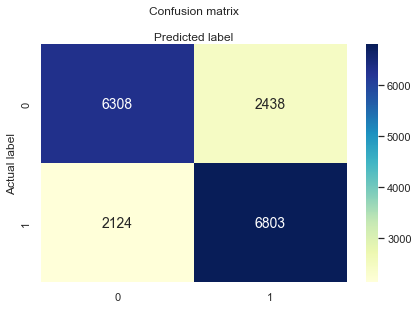

In [4]:
# Get confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Generate confusion matrix visualisation
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sb.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_pred, y_test))

# K-Nearest Neighbors

---


## Data (Input Variables)

In [5]:
# Import Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
sb.set(style="white")
sb.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn import preprocessing
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [6]:
# Display basic variables
csv_data = pd.read_csv('Cleaned_Diabetes.csv')
print(csv_data.shape)
print(list(csv_data.columns))
csv_data.head()

(70692, 22)
['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1.0,1.0,1.0,40,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5,1.0,1.0,1.0,0.0,9,4,3
1,0,0.0,0.0,0.0,25,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3,0.0,0.0,0.0,0.0,7,6,1
2,0,1.0,1.0,1.0,28,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5,1.0,1.0,1.0,0.0,9,4,8
3,0,1.0,0.0,1.0,27,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2,0.0,0.0,0.0,0.0,11,3,6
4,0,1.0,1.0,1.0,24,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2,1.0,0.0,0.0,0.0,11,5,4


## K-Nearest Neighbors Classifier

In [7]:
# Split dataset into independent and dependent variable
independent_variable = ['HighBP', 'HighChol', 'HeartDiseaseorAttack', 'Stroke', 'HvyAlcoholConsump', 'PhysActivity', 'BMI', 'Age', 'Income']
X = csv_data[independent_variable]
y = csv_data.Diabetes_binary

# Split X and y into training and testing sets (75% data will be used for model training and 25% for model testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

# Compare accuracy to find best k value (WARNING WILL TAKE AWHILE)
scores = {}
for nodes in range(1, 11):
    # Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors = nodes)

    # Train the model using the training sets
    knn.fit(X_train, y_train)

    # Predict the response for test dataset
    y_pred = knn.predict(X_test)

    # Model Accuracy, how often is the classifier correct?
    score = metrics.accuracy_score(y_test, y_pred)
    scores[nodes] = score
    print("Accuracy for", nodes, "nodes:", score)

Accuracy for 1 nodes: 0.6521247100096192
Accuracy for 2 nodes: 0.6401290103547784
Accuracy for 3 nodes: 0.6888473943303344
Accuracy for 4 nodes: 0.677417529564873
Accuracy for 5 nodes: 0.7036156849431336
Accuracy for 6 nodes: 0.6987495048944717
Accuracy for 7 nodes: 0.7149889662196571
Accuracy for 8 nodes: 0.7096701182594919
Accuracy for 9 nodes: 0.7188366434674363
Accuracy for 10 nodes: 0.7141402138855882


In [9]:
# Find the highest K value for the dataset
print("K Value of '{}' has the highest accuracy of {}".format(max(scores, key=scores.get), scores[max(scores, key=scores.get)]))

K Value of '9' has the highest accuracy of 0.7188366434674363


Accuracy: 0.7188366434674363
Precision: 0.7148284845853234
Recall: 0.737649826369441
F1 Score: 0.7260598709961961


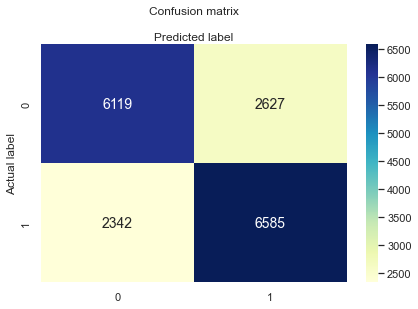

In [10]:
# Regenerate y prediction value using highest accuracy k value
knn = KNeighborsClassifier(n_neighbors = max(scores, key=scores.get))

# Train the model using the training sets
knn.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = knn.predict(X_test)

# Get confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Generate confusion matrix visualisation
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sb.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_pred, y_test))

# Conclusion

|                   | K-Nearest Neighbors | Logistic Regression |
| :---------------- | :------: | ----: |
| **Total Incorrect Values**        |   5237   | 5258 |
| **Total Correct Values**           |   12436   | 12415 |
| **Accuracy**    |  71.9%   | 74.2% |
| **Precision** |  71.5%   | 73.6% |
| **Recall** |  73.7%   | 76.2% |
| **F1 Score** |  72.6%   | 74.9% |

Both the K-Nearest Neighbor and Logistic Regression models performed well in predicting diabetes, with F1 Score, Accuracy, Precision and Recall values above 70%.

However, the Logistic Regression model is preferred for our problem as its recall value is higher. This is because the recall value is usually taken into consideration when there is a high cost associated with False Negatives. In our case, if a sick patient (Actual Positive) with diabetes goes through the test and is diagnosed as not sick (False Negative). The cost associated with being a False Negative is higher than being diagnosed as a False Positive as the patient will not get proper medical care.